In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
data_dir = '/scratch/aew492/research-summer2020_output'
bases_dir = os.path.join(data_dir, 'bases/bao_iterative')

### basis functions

In [3]:
bases = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0.dat'))
bases_rlz0 = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0.dat'))
bases_rlz1 = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L750_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz1.dat'))

In [4]:
bases.shape

(2000, 6)

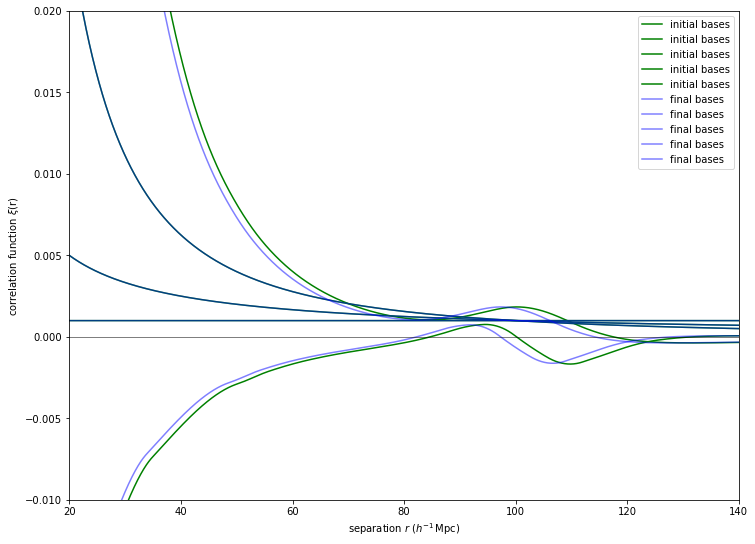

In [5]:
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(bases[:,0], bases[:,1:], color='green', label="initial bases")
plt.plot(bases_rlz0[:,0], bases_rlz0[:,1:], color='blue', label="final bases", alpha=0.5)

ax.set_xlim(20, 140)
ax.set_ylim(-.01, 0.02)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
plt.legend()

In [6]:
bases.shape, bases_rlz0.shape

((2000, 6), (2000, 6))

In [7]:
bases[:,2], bases_rlz0[:,2]

(array([0.005     , 0.00498504, 0.00497016, ..., 0.0007149 , 0.00071459,
        0.00071429]),
 array([0.005     , 0.00498504, 0.00497016, ..., 0.0007149 , 0.00071459,
        0.00071429]))

In [8]:
bases2 = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L500_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0.dat'))
bases2_rlz0 = np.loadtxt(os.path.join(bases_dir, 'tables/bases_L500_n1e-4_z057_patchy_As2x_baoiter_cosmoplanck15_test_r20.0-140.0_z0.57_bias2.0_rlz0.dat'))

In [9]:
bases2[:,1], bases2_rlz0[:,1]

(array([0.025     , 0.0248506 , 0.02470253, ..., 0.00051108, 0.00051064,
        0.0005102 ]),
 array([0.025     , 0.0248506 , 0.02470253, ..., 0.00051108, 0.00051064,
        0.0005102 ]))

### correlation functions

#### binned cf

In [10]:
cf_binned = np.load(os.path.join(data_dir, 'lognormal/xi/ls/L750_n1e-4_z057_patchy_As2x/xi_cat_L750_n1e-4_z057_patchy_As2x_lognormal_rlz1.npy'), allow_pickle=True)

#### bao_iterative

In [11]:
def load_cf(niter, ana=False):
    trr_tag = 'ana' if ana else 'num'
    rand_tag = '' if ana else '_3x'
    cf = np.load(os.path.join(bases_dir, f'results/results_lognormal_L750_n1e-4_z057_patchy_As2x/cf_baoiter_cosmoplanck15_test_trr{trr_tag}{rand_tag}_niter{niter}_L750_n1e-4_z057_patchy_As2x_rlz1.npy'), allow_pickle=True)
    return cf

In [12]:
cf_conv_num = np.load(os.path.join(data_dir, f'lognormal/xi/bao_iterative/L750_n1e-4_z057_patchy_As2x/xi_baoiter_cosmoplanck15_test_trrnum_3x_L750_n1e-4_z057_patchy_As2x_rlz1.npy'), allow_pickle=True)

In [13]:
cf_conv_ana = np.load(os.path.join(data_dir, f'lognormal/xi/bao_iterative/L750_n1e-4_z057_patchy_As2x/xi_baoiter_cosmoplanck15_test_trrana_L750_n1e-4_z057_patchy_As2x_rlz1.npy'), allow_pickle=True)

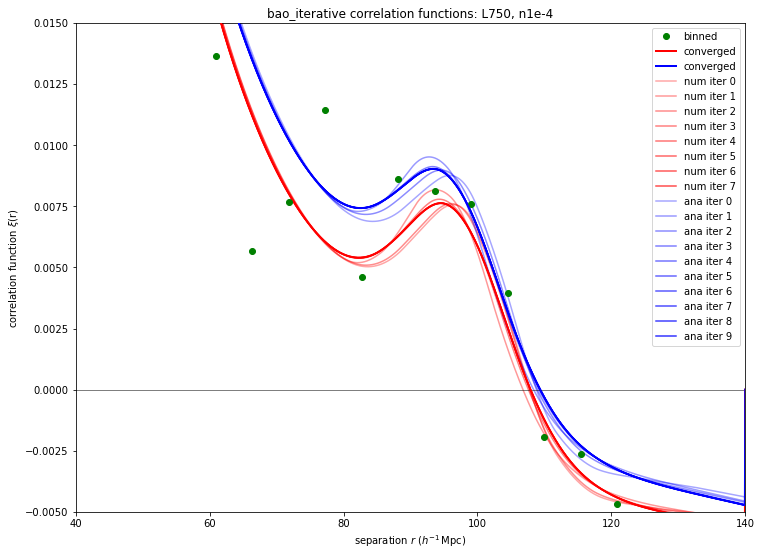

In [14]:
fig, ax = plt.subplots(figsize=(12,9))

# binned cf
plt.plot(cf_binned[0], cf_binned[1], c='g', marker='o', ls='none', label="binned", zorder=101)

# converged from bao_iterative
plt.plot(cf_conv_num[0], cf_conv_num[1], c='r', lw=2, label="converged", zorder=100)
plt.plot(cf_conv_ana[0], cf_conv_ana[1], c='b', lw=2, label="converged", zorder=101)

alpha_num = 0.3
# numeric
for i in range(8):
    cf = load_cf(i)
    alpha_num += 0.05
    plt.plot(cf[0], cf[1], c='r', alpha=alpha_num, label=f"num iter {i}")
# analytic
alpha_ana = 0.3
for i in range(10):
    cf = load_cf(i, ana=True)
    alpha_ana += 0.05
    plt.plot(cf[0], cf[1], c='b', alpha=alpha_ana, label=f"ana iter {i}")

ax.set_xlim(40, 140)
ax.set_ylim(-.005, 0.015)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title('bao_iterative correlation functions: L750, n1e-4')
plt.legend()

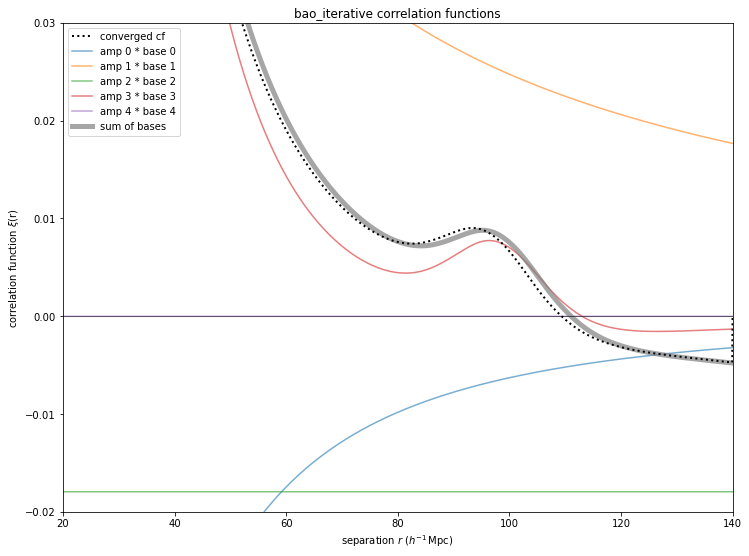

In [15]:
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(cf_conv_ana[0], cf_conv_ana[1], label="converged cf", c='k', ls=':', lw=2, zorder=100)

amps = cf_conv_ana[2]
basesxamps = np.empty((len(bases_rlz1[:,0]), len(amps)))
for i in range(len(amps)):
    base = amps[i] * bases_rlz1[:,i+1]
    plt.plot(bases_rlz1[:,0], base, label=f"amp {i} * base {i}", alpha=.6)
    basesxamps[:,i] = base
bases_sum = np.sum(basesxamps, axis=1)
plt.plot(bases_rlz1[:,0], bases_sum, c='gray', alpha=.7, ls='-', lw=5, label="sum of bases")

ax.set_xlim(20, 140)
ax.set_ylim(-.02, 0.03)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title('bao_iterative correlation functions')
plt.legend()

### analytic vs. numeric

In [16]:
path_conv = os.path.join(data_dir, 'lognormal/xi/bao_iterative/L750_n1e-4_z057_patchy_As2x')
nmocks = 401

In [17]:
# analytic
xis_ana = np.empty((nmocks, 2000))

for i in range(nmocks):
    xi_ana = np.load(os.path.join(path_conv, f'xi_baoiter_cosmoplanck15_test_trrana_L750_n1e-4_z057_patchy_As2x_rlz{i}.npy'), allow_pickle=True)
    xis_ana[i] = xi_ana[1]

avg_xi_ana = np.array([xi_ana[0], np.mean(xis_ana, axis=0)]).T

In [18]:
def load_num(rand_mult, rfine=2000, boxsize=750, n='1e-4'):
    
    path_conv = f'/scratch/aew492/research-summer2020_output/lognormal/xi/bao_iterative/L{boxsize}_n{n}_z057_patchy_As2x'
    xis_num = np.empty((nmocks, rfine))

    for i in range(nmocks):
        xi_num = np.load(os.path.join(path_conv, f'xi_baoiter_cosmoplanck15_test_trrnum_{rand_mult}x_L{boxsize}_n{n}_z057_patchy_As2x_rlz{i}.npy'), allow_pickle=True)
        xis_num[i] = xi_num[1]

    avg_xi_num = np.array([xi_num[0], np.mean(xis_num, axis=0)]).T
    
    return avg_xi_num

In [19]:
avg_xi_num_3x = load_num(3)
avg_xi_num_5x = load_num(5)

In [20]:
# true correlation function
r_t, cf_true = np.loadtxt(f"/scratch/ksf293/mocks/lognormal/inputs/cat_L750_n1e-4_z057_patchy_As2x_Rh_xi.txt", unpack=True)
xi_true = 4*cf_true

In [21]:
# standard estimator
path_ls = '/scratch/aew492/research-summer2020_output/lognormal/xi/ls/L750_n1e-4_z057_patchy_As2x'
xis_ls = np.empty((nmocks, 22))

for i in range(nmocks):
    xi_ls = np.load(os.path.join(path_ls, f'xi_cat_L750_n1e-4_z057_patchy_As2x_lognormal_rlz{i}.npy'), allow_pickle=True)
    xis_ls[i] = xi_ls[1]

avg_xi_ls = np.array([xi_ls[0], np.mean(xis_ls, axis=0)]).T

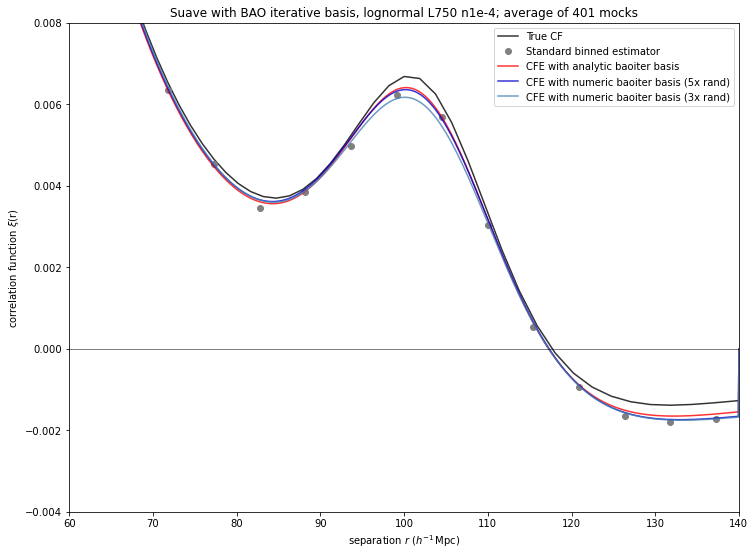

In [22]:
# plot
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(r_t, xi_true, color='k', lw=1.5, alpha=0.8, label='True CF')
plt.plot(avg_xi_ls[:,0], avg_xi_ls[:,1], marker='o', ls='None', color='grey', label='Standard binned estimator')
plt.plot(avg_xi_ana[:,0], avg_xi_ana[:,1], color='r', lw=1.5, alpha=0.8, label='CFE with analytic baoiter basis')
plt.plot(avg_xi_num_5x[:,0], avg_xi_num_5x[:,1], color='mediumblue', lw=1.5, alpha=0.8, label='CFE with numeric baoiter basis (5x rand)')
plt.plot(avg_xi_num_3x[:,0], avg_xi_num_3x[:,1], color='steelblue', lw=1.5, alpha=0.8, label='CFE with numeric baoiter basis (3x rand)')

ax.set_xlim(60, 140)
ax.set_ylim(-.004, 0.008)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'Suave with BAO iterative basis, lognormal L750 n1e-4; average of {nmocks} mocks')
plt.legend()

### numeric: periodic True vs False

In [23]:
# periodic = False
avg_xi_num_perF = avg_xi_num_3x

In [24]:
# periodic = True
xis_num_perT = np.empty((nmocks, 2000))

for i in range(nmocks):
    xi_num_perT = np.load(os.path.join(path_conv,
        f'xi_baoiter_cosmoplanck15_test_trrnum_3x_perTrue_L750_n1e-4_z057_patchy_As2x_rlz{i}.npy'), allow_pickle=True)
    xis_num_perT[i] = xi_num_perT[1]

avg_xi_num_perT = np.array([xi_num_perT[0], np.mean(xis_num_perT, axis=0)]).T

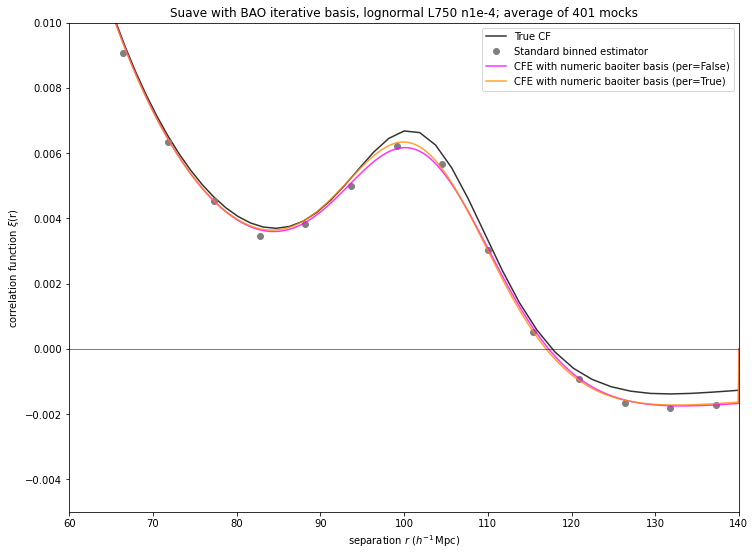

In [25]:
# plot
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(r_t, xi_true, color='k', lw=1.5, alpha=0.8, label='True CF')
plt.plot(avg_xi_ls[:,0], avg_xi_ls[:,1], marker='o', ls='None', color='grey', label='Standard binned estimator')
plt.plot(avg_xi_num_perF[:,0], avg_xi_num_perF[:,1], color='magenta', lw=1.5, alpha=0.8, label='CFE with numeric baoiter basis (per=False)')
plt.plot(avg_xi_num_perT[:,0], avg_xi_num_perT[:,1], color='darkorange', lw=1.5, alpha=0.8, label='CFE with numeric baoiter basis (per=True)')

ax.set_xlim(60, 140)
ax.set_ylim(-.005, 0.01)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_title(f'Suave with BAO iterative basis, lognormal L750 n1e-4; average of {nmocks} mocks')
plt.legend()